[View in Colaboratory](https://colab.research.google.com/github/SharoonSaxena/Nepal_earthQuake_tweets_Classification/blob/master/NepalEarthquakeTweetClassification.ipynb)

# Nepal Earthquake Tweet Classification

## About the dataset

#### This data set consists $18233$ number of Tweets extracted from the Social Media Website  Twitter.com, as these tweets were extracted duting the Nepal Eathquake crisis. This dataset contains tweets addressing the Nepal Eathquake. The Tweets are labeleed as follow:
### $(1)$ Irrelevant tweets, they have no significance.
### $(2)$ Tweets that specify a need or demand for help or supplies.
### $(3)$ Tweets that Offer Help and Supplies.

## Problem
#### Any good Smaritan would have found it to be vey difficult to detect a tweet needing help or the ones ready to offer help.

#### Our job as a Beginner Data Scientist is to detect and classify the relevent tweets.

## Importing the Libraries

In [25]:
import pandas as pd              # For data Manipulation
import numpy as np               # For efficient numerical computation
import seaborn as sns            # For "pretty" Visualisations
import matplotlib.pyplot as plt  # Library containing Visualisation Tools
!pip install wordcloud
from wordcloud import WordCloud  # For WordCloud Visualisation
import datetime                  # Allows us to use functions related to date and time

## Importing the Dataset

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: 18SuBxMWHO8zId13GMycCywOda53FWL-W
file_id = '18SuBxMWHO8zId13GMycCywOda53FWL-W'
downloaded = drive.CreateFile({'id': file_id})


In [0]:
import io
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))
df = pd.read_csv(io.StringIO(downloaded.GetContentString()))

## First look at the dataset

In [28]:
df.head(7)                    #Prints first 7 rows from the dataset

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see


In [29]:
df.tail(7)                   #Prints last 7 rows of the dataset

,TweetClass,TweetID,TweetText
18226,2,592697492422144000,#UttarPradesh \\u200bgovt sends buses to #Nepa...
18227,2,592696857815572481,Sikh organization to send lakh food packets to...
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [30]:
df.shape    # prints the sahpe of the Dataset

(18233, 3)

In [31]:
df.describe() # tells about the basic statistics of the dataset

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


 There appears to be **no missing data**

In [32]:
df['TweetClass'].value_counts()    #Counts the occourance of each catagory

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

The data appears to be** very Skewed and unbalanced**, the Graph below verifies it.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


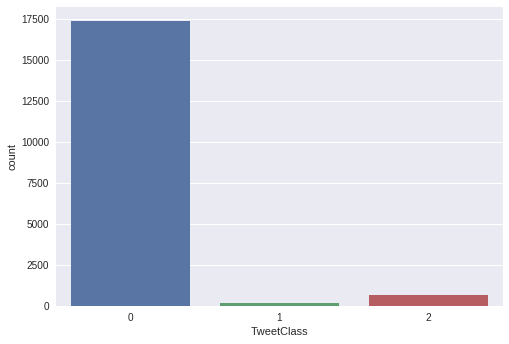

In [33]:
sns.countplot(x='TweetClass', data=df)

In [36]:
dupli=df.duplicated()  # Checking for duplicates
dupli.value_counts()

False    18233
dtype: int64

All the duplicacy queries are False, i.e. **there are no duplicates.**

## WordCloud

#### Data visualizations (like charts, graphs, infographics, and more) give businesses a valuable way to communicate important information at a glance, but what if your raw data is text-based? If you want a stunning visualization format to highlight important textual data points, using a word cloud can make dull data sizzle and immediately convey crucial information.

#### Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

### Segmenting Each Tweet class dor WordCloud Visualisation

#### Visualising the most frequent words in the Non-Relevant Tweets.

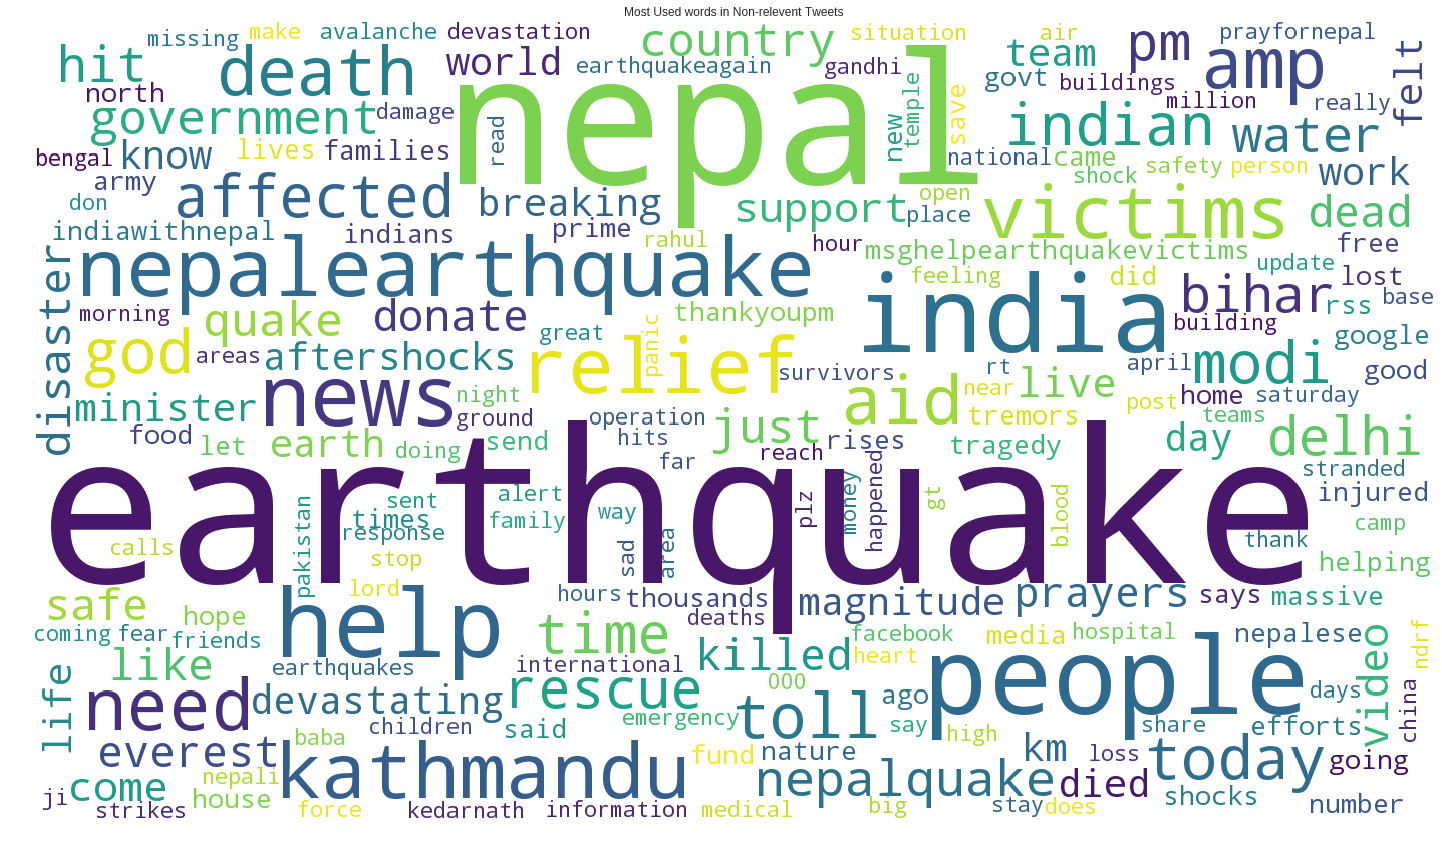

In [37]:
from sklearn.feature_extraction.text import CountVectorizer                                               # Vectorises the text

# NON RELEVENT
non_relevant_df     = df[df['TweetClass'] == 0]                                                           # Filtering out non-relevent Tweets from the dataset
non_relevant_vector = CountVectorizer(stop_words = 'english')                                             # Removing: stop_words = Trivial words like a,the,is... etc.
non_relevant_dtm    = non_relevant_vector.fit_transform(non_relevant_df['TweetText'].values.astype('U'))  # Implementing CountVectoriser Object
non_relevant_words  = non_relevant_vector.get_feature_names()                                             # A Vector of non_relevant words
non_relevant_freqs  = non_relevant_dtm.sum(axis = 0).A1                                                   # Storing Frequency of each word
non_relevant_result = dict(zip(non_relevant_words,non_relevant_freqs))                                    # Dictionary of word with their frequencies


# Visualising
wordcloud = WordCloud(background_color = 'white',
                   width = 1400,
                   height = 800).generate_from_frequencies(non_relevant_result)
fig=plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used words in Non-relevent Tweets")
fig.savefig("non_Relevant_wordcloud.png")
plt.show()

 There, We can now easily see the most frequently used words in the Non_Relevant tweets.

#### Visualising the most frequent words in the **Needful Tweets**.

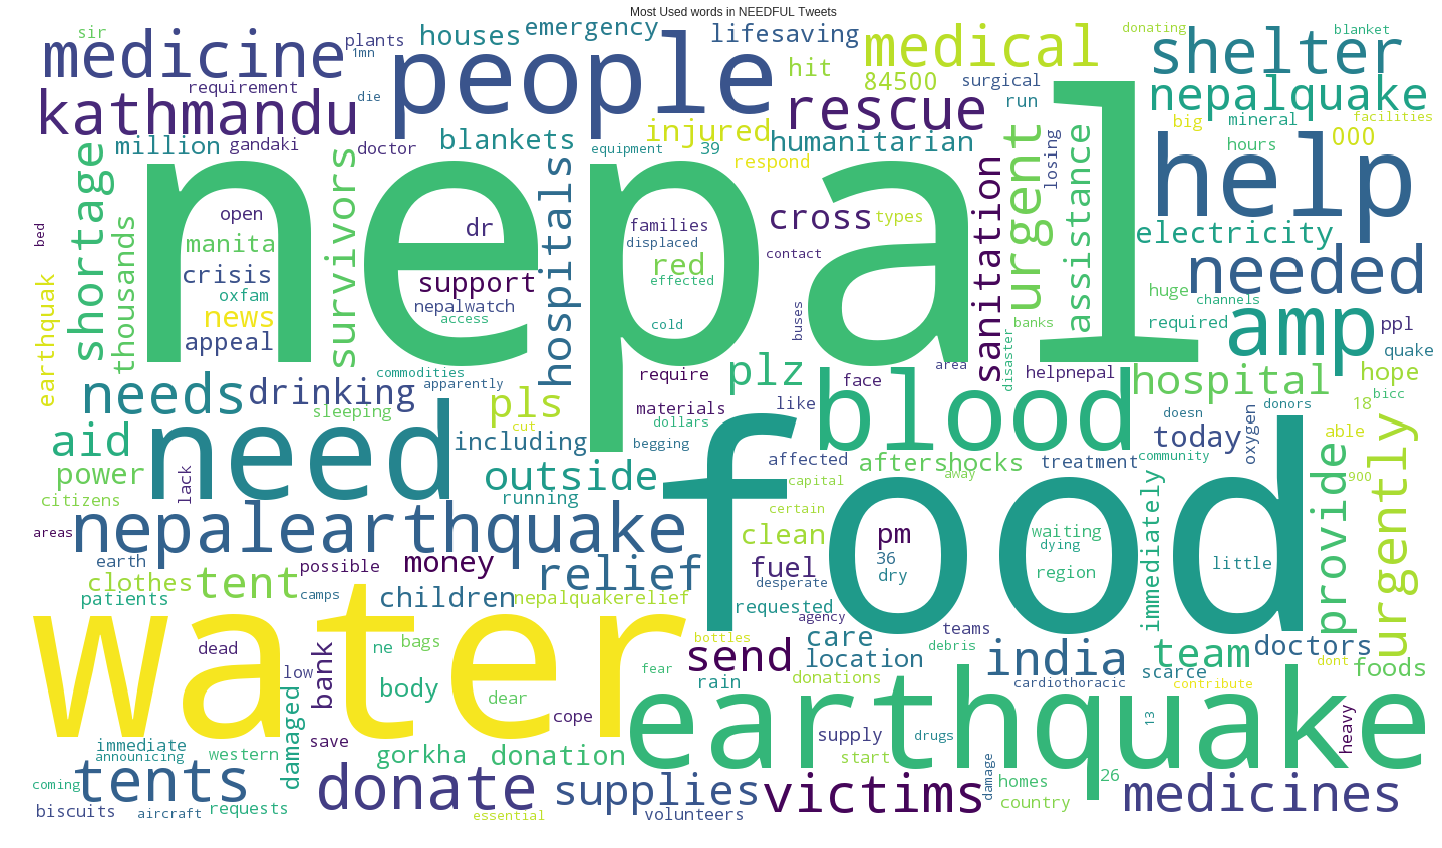

In [38]:
# NEED
need_df     = df[df['TweetClass'] == 1]                                           # Filtering out NEED Tweets from the dataset
need_vector = CountVectorizer(stop_words = 'english')                             # Removing: stop_words = Trivial words like a,the,is... etc.
need_dtm    = need_vector.fit_transform(need_df['TweetText'].values.astype('U'))  # Implementing CountVectoriser Object
need_words  = need_vector.get_feature_names()                                     # A Vector of non_relevant words
need_freqs  = need_dtm.sum(axis = 0).A1                                           # Storing Frequency of each word
need_result = dict(zip(need_words,need_freqs))                                    # Dictionary of word with their frequencies


# Visualising
wordcloud = WordCloud(background_color = 'white',
                   width = 1400,
                   height = 800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used words in NEEDFUL Tweets")
fig.savefig("NEED_wordcloud.png")
plt.show()

 We can Observe that frequent words are associated to what people might have **Needed**

#### Visualising the most frequent words in the Offer Tweets.

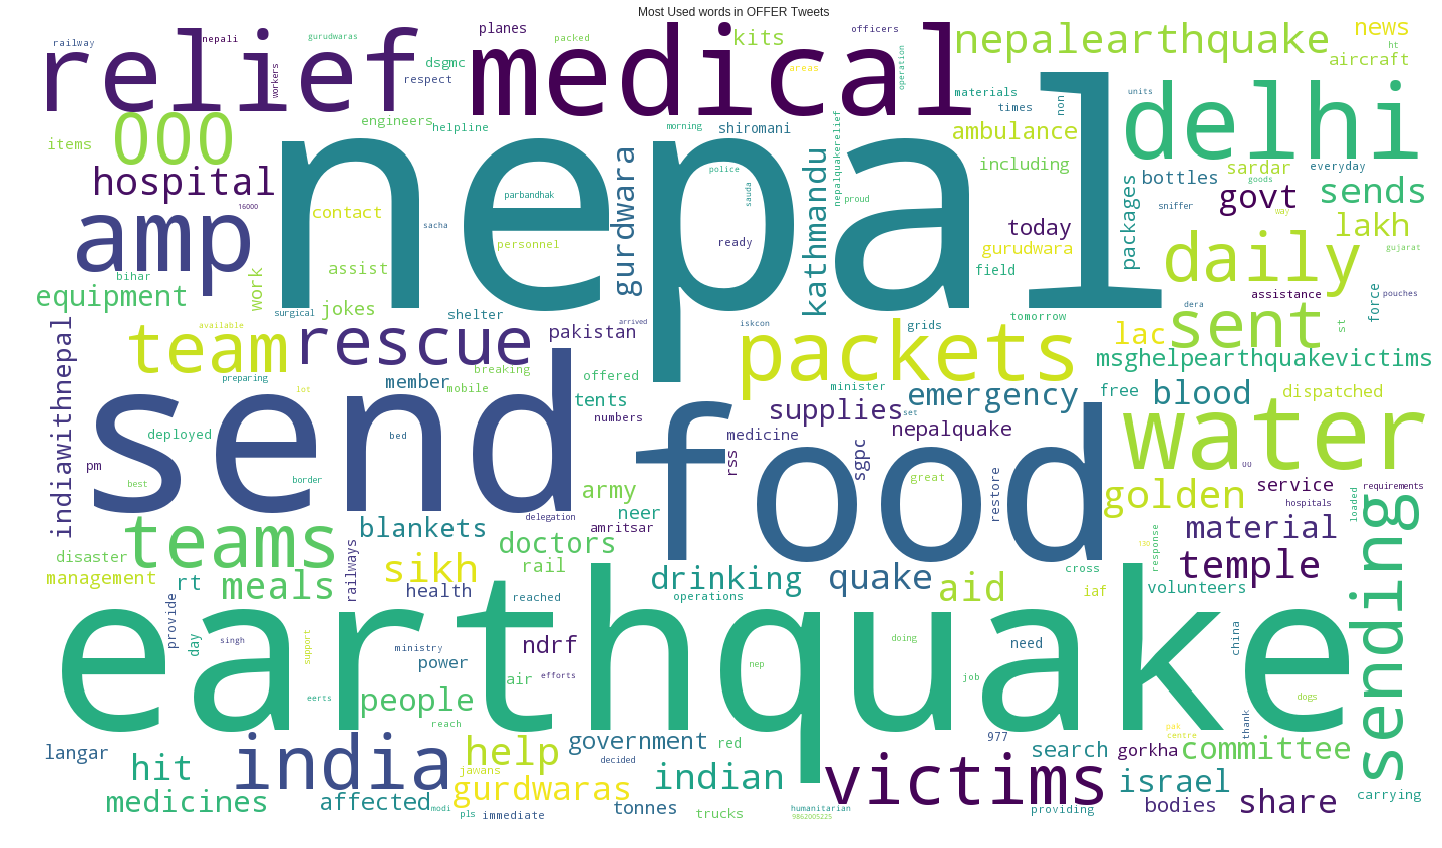

In [39]:
# Offer
offer_df     = df[df['TweetClass'] == 2]                                              # Filtering out NEED Tweets from the dataset
offer_vector = CountVectorizer(stop_words = 'english')                                # Removing: stop_words = Trivial words like a,the,is... etc.
offer_dtm    = offer_vector.fit_transform(offer_df['TweetText'].values.astype('U'))   # Implementing CountVectoriser Object
offer_words  = offer_vector.get_feature_names()                                       # A Vector of non_relevant words
offer_freqs  = offer_dtm.sum(axis = 0).A1                                             # Storing Frequency of each word
offer_result = dict(zip(offer_words,offer_freqs))                                     # Dictionary of word with their frequencies


# Visualising
wordcloud = WordCloud(background_color = 'white',
                   width = 1400,
                   height = 800).generate_from_frequencies(offer_result)
fig=plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used words in OFFER Tweets")
fig.savefig("OFFER_wordcloud.png")
plt.show()

Here, one can easily observe the words used in offering various resources to the victims.

## Preparing A Classification Model

### Splitting the Dataset

In [0]:
x = df.TweetText         # Independent Variable
y = df.TweetClass      # Dependent Variable

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.125, random_state=42)     # Splitting the 12.5% data to test set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15953,)
(2280,)
(15953,)
(2280,)


### Using Tf-Idf Vectoriser.

Normally, A simple CountVectoriser gives equal emphasis to every word, relevant or not.

Whereas, Term Frequesncy (Tf) - Inverse Document Frequesncy (Idf Vectoriser give more emphasis to words)

This gives emphasis to the words that Appeas Less often and hold more value over others.


In [42]:
# Preparing Vocabulory from the Training set and also Vectorising the Training set.
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer( stop_words = ['english'],ngram_range = [1,2])     # ngrams allow us to retain sequential pattern of words
x_train_vectorised = vectoriser.fit_transform(x_train.values.astype('U'))
print(x_train_vectorised.shape)

# Vectorising the test set
x_test_vectorised = vectoriser.transform(x_test)
print(x_test_vectorised.shape)

(15953, 106910)
(2280, 106910)


### Making a learning model
For this Text Classification Example Multinomial Naive Baye's works best for data containing wordcounts.

### GridSearcCV
In machine learning, two tasks are commonly done at the same time in data pipelines: cross validation and (hyper)parameter tuning. Cross validation is the process of training learners using one set of data and testing it using a different set. Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# making skeletal model
classifier = MultinomialNB()                         #Base Estimator

# Set of parameters we want to try for out Model
parameters = { 'alpha' : [0.13,0.15,0.17]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_scores = grid_search.fit(x_train_vectorised , y_train)


Lets find out the **Best parameters** found by the GridSearchCV

In [57]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.9636432019055977
{'alpha': 0.15}


now we use the best paramets obtained to make our final model.

In [58]:
# Making the Final Classification model.
classifier = MultinomialNB( alpha = 0.15)
tick =datetime.datetime.now()
classifier.fit(x_train_vectorised, y_train)
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training MultinimialNB model is model = " + str(lr_train_time))

Time taken for training MultinimialNB model is model = 0:00:00.050502


now we predict the classes of tweets on the test set

In [59]:
tick=datetime.datetime.now()
result = classifier.predict(x_test_vectorised)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

Time taken to predict the data points in the Test set is : 0:00:00.016058


### Analysing Model Performance

#### Accuracy on the Training set

In [60]:
k = classifier.score(x_train_vectorised, y_train)
print('the Accuracy on the Training set comes out to be : ' + str(k))

the Accuracy on the Training set comes out to be : 0.9847050711464929


#### Accuracy on the test Set

In [61]:
k = classifier.score(x_test_vectorised, y_test)
print('the Accuracy on the Training set comes out to be : ' + str(k))

the Accuracy on the Training set comes out to be : 0.9609649122807018


#### Lets print the classification report on test set

In [62]:
import sklearn.metrics as skm
print(skm.classification_report( y_test ,result  ))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2158
          1       0.50      0.03      0.06        32
          2       0.85      0.44      0.58        90

avg / total       0.95      0.96      0.95      2280



## The f1 score comes out to be 0.95 which ensures that Model implemented is good.

Although We can still observe that Overall Recall of the Need ansd Offer tweets are fairly low.